In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sales = pd.read_csv("SalesFINAL12312016.csv", parse_dates=["SalesDate"])
purchase = pd.read_csv("PurchasesFINAL12312016.csv")
invoice = pd.read_csv("InvoicePurchases12312016.csv")
end_inv = pd.read_csv("EndInvFINAL12312016.csv")
beg_inv = pd.read_csv("BegInvFINAL12312016.csv")
purchase_price = pd.read_csv("2017PurchasePricesDec.csv")


In [ ]:
display(beg_inv.head())
display(end_inv.head())
nuniques = {"beg_inv": beg_inv.nunique(), "end_inv": end_inv.nunique()}
display(
    pd.DataFrame(nuniques).T[
        [
            "InventoryId",
            "Store",
            "City",
            "Brand",
            "Description",
            "Size",
            "onHand",
            "startDate",
            "endDate",
        ]
    ]
)
print(
    f"beg_inv Brand nunique: {beg_inv.Brand.nunique()}, desc + size nunique: {(beg_inv['Description'] + ' ' + beg_inv['Size']).nunique()}??? Might need cleaning"
)
print(
    f"end_inv Brand nunique: {end_inv.Brand.nunique()}, desc + size nunique: {(end_inv['Description'] + ' ' + end_inv['Size']).nunique()}"
)


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


,InventoryId,Store,City,Brand,Description,Size,onHand,startDate,endDate
beg_inv,206529.0,79.0,67.0,8094.0,7291.0,41.0,474.0,1.0,NaN
end_inv,224489.0,80.0,67.0,9653.0,8732.0,47.0,548.0,NaN,1.0


beg_inv Brand nunique: 8094, desc + size nunique: 8079??? Might need cleaning
end_inv Brand nunique: 9653, desc + size nunique: 9640


In [ ]:
beg_inv_brand = beg_inv.loc[:]
beg_inv_brand["Desc_Size"] = beg_inv_brand["Description"] + " " + beg_inv_brand["Size"]
group_desc = (
    beg_inv_brand[["Brand", "Desc_Size"]].groupby("Desc_Size")["Brand"].unique()
)
group_desc.loc[group_desc.apply(len) > 1]

# ? will assume brand is id for Description + Size


,Brand
Desc_Size,
Ch Beauchene Cotes du Rhone 750mL,"[43223, 43224]"
Ch Bernadotte 10 Haut Medoc 750mL,"[19630, 19695]"
Ch Brane Cantenac Margaux 11 750mL,"[90082, 23290]"
Ch Lagrange St Julien 11 GC 750mL,"[90025, 23333]"
Ch Montrose 10 750mL,"[19972, 36065]"
Ch Pesquie Cotes du Ventoux 750mL,"[35049, 38471]"
Corralejo Reposado Tequila 750mL,"[8144, 465]"
Dr Frank Johannisberg Rsl 750mL,"[37798, 37314]"
J Lohr Riverstone Chard 750mL,"[6579, 44704]"


In [ ]:
display(sales.head())
display(
    beg_inv.loc[
        (beg_inv["Brand"] == 1004) & (beg_inv["InventoryId"] == "1_HARDERSFIELD_1004")
    ]
)
# ? Inventory ID = store_city_brand, Brand = description + Size, With Inventory ID we can find how many onhand the inventory have at the beginning and end.
print(sales.Classification.unique())

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
117,1_HARDERSFIELD_1004,1,HARDERSFIELD,1004,Jim Beam w/2 Rocks Glasses,750mL,17,16.49,2016-01-01


[1 2]


In [ ]:
display(purchase.head())
display(invoice.head())
# * assume, lead time = Receiving Date - Purchase Order Date. They did not produce their own goods but buy from vendors.
#  * freight is cargo or shipping cost.


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1.0


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [ ]:
display(purchase_price.head())
purchase_price_vendor = purchase_price["VendorName"].unique()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [ ]:
from statsmodels.tsa.api import SARIMAX
from IPython.display import clear_output
from math import pow
import plotly.express as px

# * group by date, sum sales quantity to get total sales quantity per day
sales_quantity_price = sales.groupby("SalesDate").agg({"SalesQuantity": "sum"})

# * load ARIMA, Autoregressive Moving Average
mod = SARIMAX(sales_quantity_price,order=(5, 1, 1),type="c")
res = mod.fit()

# * add more dates to sales_quantity_price, predict until 2016-03-31
for i in pd.date_range("2016-03-01", "2016-03-31", freq="D"):
    sales_quantity_price.loc[i, "SalesQuantity"] = None
sales_quantity_price["forecast"] = res.predict(1, 90)

# * plot
clear_output()
px.line(sales_quantity_price, x=sales_quantity_price.index, y=["SalesQuantity","forecast"]).show()


# * calculate MAPE error
absolute_diff = abs(sales_quantity_price["SalesQuantity"] - sales_quantity_price["forecast"])
relative_diff = absolute_diff / sales_quantity_price["SalesQuantity"] * 100
print("\n MAPE:",relative_diff.dropna().mean())

# * Calculate R2
# Calculate the mean of actual values
mean_actual = sales_quantity_price["SalesQuantity"].mean()

# Calculate the total sum of squares (SST)
sst = ((sales_quantity_price["SalesQuantity"] - mean_actual) ** 2).sum()

# Calculate the residual sum of squares (SSR)
ssr = ((sales_quantity_price["SalesQuantity"] - sales_quantity_price["forecast"]) ** 2).sum()

# Calculate R^2
r2 = 1 - (ssr / sst)
print(f'R^2: {r2}')

print(relative_diff.sort_values(ascending=False).head(3))

print("May Forecast Total Demand: ",sales_quantity_price.loc["2016-03-01":"2016-03-31", "forecast"].sum())


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()



 MAPE: 59.16774438622555
R^2: 0.6958413424597891
SalesDate
2016-02-01    837.824424
2016-02-04    737.133405
2016-02-05    264.263724
dtype: float64
May Forecast Total Demand:  254853.52898825431


<Axes: xlabel='SalesDate'>

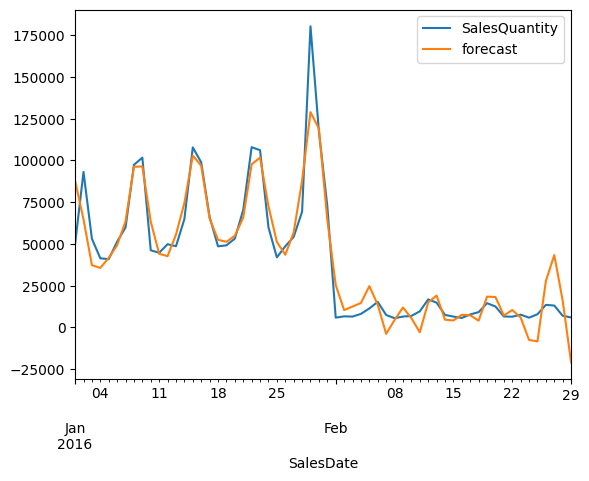

In [ ]:
# ? Attempt using seasonality monthly, because there is only 2 month of data and 1 month change, the model interpret this as every month there is change

from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'sales' is your DataFrame
sales_quantity_price = sales.groupby("SalesDate").agg({"SalesQuantity": "sum"})
sales_quantity_price.index = pd.to_datetime(sales_quantity_price.index)
sales_quantity_price['week'] = sales_quantity_price.index.month
sales_quantity_price['day'] = sales_quantity_price.index.dayofweek

# Correcting the frequency to 'M' for month end
fourierM = CalendarFourier(freq="M", order=6)

dp = DeterministicProcess(
    index=sales_quantity_price.index,
    constant=True,
    order=4,
    seasonal=True,
    additional_terms=[fourierM],
)

X = dp.in_sample()
model = LinearRegression().fit(X, sales_quantity_price['SalesQuantity'])
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name="fitted"
)

sales_quantity_price["forecast"] = y_pred
sales_quantity_price[["SalesQuantity", "forecast"]].plot()


In [ ]:
  ABC = (
    sales.groupby("Brand")
    .agg({"SalesQuantity": "sum"})
    .sort_values("SalesQuantity", ascending=False)
)
display(
    "Top 5 Demand",
    ABC.head(),
    "Bottom 5 Demand",
    ABC.tail(),
    "describe data",
    ABC.describe().T,
)
bins = [0, 100, 1000, 30000]
labels = ["C: <100", "B: 100-1k", "A: 1k-30k"]
ABC['bin'] = pd.cut(ABC["SalesQuantity"], bins, labels=labels)

'Top 5 Demand'

,SalesQuantity
Brand,
8111,28544
1892,23121
4261,20226
3606,19200
5111,18411


'Bottom 5 Demand'

,SalesQuantity
Brand,
17576,1
4308,1
4260,1
4164,1
5114,1


'describe data'

,count,mean,std,min,25%,50%,75%,max
SalesQuantity,7658.0,320.079525,1015.017597,1.0,10.0,49.0,238.0,28544.0


Text(0, 0.5, 'Frequency')

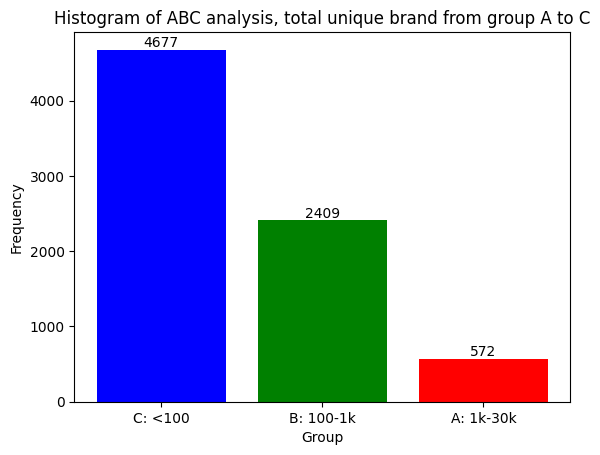

In [ ]:
plt.bar(ABC['bin'].value_counts().index, ABC['bin'].value_counts().values, color=['blue','green','red'])
for i, value in enumerate(ABC['bin'].value_counts().values):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.title('Histogram of ABC analysis, total unique brand from group A to C')
plt.xlabel('Group')
plt.ylabel('Frequency')

In [ ]:
total_group = ABC.groupby('bin').agg({"SalesQuantity":'sum'})['SalesQuantity']
total = px.histogram(total_group.value_counts(), x=total_group.index, y=total_group.values, color=total_group.index, title="ABC analysis, total sales of brand from group A to C",text_auto=True)
total.update_layout(
  width=800,
  height=600,
    xaxis_title='Group',
    yaxis_title='Total_sales',
    bargap=0.1,  # Gap between bars
)
total.show()

<ipython-input-14-1473d405d245>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# * Demand 2 month
from math import pow, ceil


demand_jan_feb = (

    sales.groupby("Brand")

    .agg({"SalesQuantity": "sum"})

    .sort_values("SalesQuantity", ascending=False)
)


# * Cost Per Order (CPO), Freight Cost

purchase_invoice = pd.merge(
    left=purchase[["PONumber", "Brand", "Description", "Size", "Quantity"]],
    right=invoice,
    on="PONumber",
    how="right",
)

purchase_invoice_vol = pd.merge(
    left=purchase_invoice,
    right=purchase_price[["Brand", "Volume"]],
    on="Brand",
    how="left",
)
purchase_invoice_vol["vol_quantity"] = purchase_invoice_vol["Quantity_x"].astype(
    "float"
) * purchase_invoice_vol["Volume"].astype("float")
purchase_invoice_vol.set_index("PONumber", inplace=True)
purchase_invoice_vol["vol_quantity_total"] = purchase_invoice_vol.groupby(
    "PONumber"
).agg({"vol_quantity": "sum"})
purchase_invoice_vol["CPO"] = (
    purchase_invoice_vol["vol_quantity"]
    / purchase_invoice_vol["vol_quantity_total"]
    * purchase_invoice_vol["Freight"]
)
# **************************************
CPO = purchase_invoice_vol.groupby("Brand").agg({"CPO": "mean"})
#****************************************
# * Cost Per Unit (C), Holding Cost (%) assume holding cost = 30%, Holding Cost ($) = I*C = I*0.3
C = purchase_price[["Brand", "PurchasePrice"]].set_index("Brand")
H = C * 0.3

# * Combine to Brand
EOQ = demand_jan_feb.copy()
EOQ["CPO"] = CPO
EOQ["H"] = H

# * Calculate and dropna
EOQ["EOQ"] = 2 * EOQ["SalesQuantity"] * EOQ["CPO"] / EOQ["H"]
EOQ["EOQ"] = EOQ["EOQ"].apply(lambda x: ceil(pow(x, 0.5)) if pd.notna(x) else 0)
EOQ.dropna(inplace=True)
EOQ["Volume"] = purchase_price[["Brand", "Volume"]].set_index("Brand")
EOQ['ABC']=ABC['bin']
display(EOQ.head(15), EOQ.describe(),EOQ.groupby("ABC").agg({"EOQ":"mean"}).T)

<ipython-input-15-9a1bcfefe0c4>:60: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,SalesQuantity,CPO,H,EOQ,Volume,ABC
Brand,,,,,,
8111,28544,0.351057,0.231,295,50,A: 1k-30k
1892,23121,0.353185,0.216,275,50,A: 1k-30k
4261,20226,3.125826,4.851,162,1750,A: 1k-30k
3606,19200,0.358918,0.222,250,50,A: 1k-30k
5111,18411,0.246000,0.216,205,50,A: 1k-30k
3837,14057,0.383826,0.216,224,50,A: 1k-30k
4135,12477,0.370174,0.234,199,50,A: 1k-30k
4157,12102,0.373554,0.216,205,50,A: 1k-30k
3545,11883,2.554784,6.567,97,1750,A: 1k-30k


,SalesQuantity,CPO,H,EOQ
count,6935.000000,6935.000000,6935.000000,6935.000000
mean,352.593800,0.523631,5.193628,9.173901
std,1061.340824,0.464325,11.953379,14.991586
min,1.000000,0.001912,0.114000,1.000000
25%,14.000000,0.288252,2.010000,2.000000
50%,65.000000,0.445843,3.018000,5.000000
75%,284.000000,0.630171,5.214000,11.000000
max,28544.000000,12.124485,687.021000,295.000000


ABC,C: <100,B: 100-1k,A: 1k-30k
EOQ,2.951491,11.546778,42.253497


In [ ]:
# * Average Daily Unit Sales
sales_velocity = (
    sales.groupby(["Brand", "Description"]).agg({"SalesQuantity": "sum"}).reset_index()
)
days = (
    pd.to_datetime(sales["SalesDate"]).max() - pd.to_datetime(sales["SalesDate"]).min()
).days
sales_velocity["mean_daily_sales"] = sales_velocity["SalesQuantity"] / days
mean_daily_sales = sales_velocity.set_index("Brand")["mean_daily_sales"]
display(mean_daily_sales.to_frame().T, mean_daily_sales.describe().to_frame().T)

Brand,58,60,61,62,63,72,75,77,79,82,...,90014,90025,90080,90081,90082,90084,90085,90086,90087,90089
mean_daily_sales,4.881356,2.101695,0.40678,2.745763,2.220339,0.322034,0.050847,15.389831,7.050847,0.050847,...,0.237288,0.20339,0.322034,0.118644,0.050847,0.033898,0.033898,0.016949,0.016949,0.457627


,count,mean,std,min,25%,50%,75%,max
mean_daily_sales,7658.0,5.425077,17.203688,0.016949,0.169492,0.830508,4.033898,483.79661


In [ ]:
# * Average Lead Time
purchase["lead_time"] = (
    pd.to_datetime(purchase["ReceivingDate"]) - pd.to_datetime(purchase["PODate"])
).dt.days
lead_time_brand = purchase.groupby("Brand").agg({"lead_time": "mean"})
display(lead_time_brand.T, lead_time_brand.describe().T)

Brand,58,60,61,62,63,70,72,75,77,79,...,90014,90080,90085,90086,90087,90089,90090,90604,90609,90631
lead_time,7.664688,7.0,8.3125,7.434889,7.444134,7.333333,8.54386,7.0,7.256198,7.257062,...,7.0,12.0,8.5,9.0,5.0,8.5,5.0,8.090909,10.1,9.982759


,count,mean,std,min,25%,50%,75%,max
lead_time,9685.0,7.870365,1.20144,3.0,7.271552,7.790698,8.359116,13.0


In [ ]:
# * Safety Stock
max_sales_brand = sales.groupby("Brand").agg({"SalesQuantity": "max"})
safety_stock = (
    max_sales_brand["SalesQuantity"]
    - sales_velocity.set_index("Brand")["mean_daily_sales"]
)
display(safety_stock.to_frame().T, safety_stock.describe().to_frame().T)
# * notice there are negatives to fix this problem we will just set them to 0
safety_stock[safety_stock < 0] = 0

Brand,58,60,61,62,63,72,75,77,79,82,...,90014,90025,90080,90081,90082,90084,90085,90086,90087,90089
0,2.118644,0.898305,11.59322,0.254237,1.779661,2.677966,0.949153,-7.389831,-2.050847,2.949153,...,11.762712,9.79661,7.677966,5.881356,1.949153,0.966102,1.966102,0.983051,0.983051,11.542373


,count,mean,std,min,25%,50%,75%,max
0,7658.0,6.12794,16.949081,-356.79661,1.508475,3.762712,9.525424,407.966102


In [ ]:
# * Reorder Point Analysis
RPA = (lead_time_brand['lead_time'] * mean_daily_sales) + safety_stock
RPA.name = "ReorderPoint"
RPA.dropna(inplace=True)
RPA = RPA.apply(lambda x: ceil(x)).to_frame()
RPA['ABC'] = ABC['bin']
display(RPA.T,RPA.describe().T)

Brand,58,60,61,62,63,72,75,77,79,82,...,90010,90011,90012,90013,90014,90080,90085,90086,90087,90089
ReorderPoint,40,16,15,21,19,6,2,112,52,4,...,3,14,8,15,14,12,3,2,2,16
ABC,B: 100-1k,B: 100-1k,C: <100,B: 100-1k,B: 100-1k,C: <100,C: <100,B: 100-1k,B: 100-1k,C: <100,...,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100,C: <100


,count,mean,std,min,25%,50%,75%,max
ReorderPoint,7031.0,53.630636,138.962264,2.0,6.0,17.0,47.0,3736.0


In [ ]:
fig = px.histogram(
    RPA, x="ReorderPoint", color="ABC", nbins=50, title="Reorder Point Analysis distribution", log_y=True
)
fig.update_layout(
    bargap=0.2,
    xaxis_title_text="total_count_brand",  # xaxis label
    yaxis_title_text="ReorderPointBin",  # yaxis label

)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
fig = px.histogram(lead_time_brand, x='lead_time', nbins=50, title="Lead Time Analysis distribution",text_auto=True)
fig.update_layout(
    bargap=0.1,
    xaxis_title_text="average_lead_time",  # xaxis label
    yaxis_title_text="total_count_brand",  # yaxis label
    height=600
)
fig.show()

In [ ]:
import plotly.graph_objects as go

annual_inventory_value = end_inv.copy()
annual_inventory_value["total_value"] = (
    annual_inventory_value["onHand"] * annual_inventory_value["Price"]
)
brand_inventory_value = annual_inventory_value.groupby("Brand").agg(
    {"Price": "first", "Description": "first", "total_value": "sum", "onHand": "sum"}
)

brand_inventory_value.sort_values("total_value", ascending=False, inplace=True)
brand_inventory_value["RPA"] = RPA["ReorderPoint"]
brand_inventory_value["total_value_if_RPA"] = (
    brand_inventory_value["RPA"] * brand_inventory_value["Price"]
)
brand_inventory_value["total_value_saved_if_RPA"] = (
    brand_inventory_value["total_value"] - brand_inventory_value["total_value_if_RPA"]
)
brand_inventory_value.dropna(inplace=True)

fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x=brand_inventory_value["total_value"],
        name="end of year inventory",
        nbinsx=50,
    )
)
fig.add_trace(
    go.Histogram(
        x=brand_inventory_value["total_value_if_RPA"],
        name="if follow reorder point/optimal level",
        nbinsx=50,
    )
)
fig.update_yaxes(type="log")
fig.update_layout(
    title_text="Total Inventory Value Distribution",
    xaxis_title_text="total inventory value",  # xaxis label
    yaxis_title_text="total number of brands",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)

fig.show()

display(brand_inventory_value[['total_value','total_value_if_RPA','total_value_saved_if_RPA']].sum().apply(lambda x: f"${x:,.0f}").to_frame().T)
brand_inventory_value["total_value"] = brand_inventory_value["total_value"].apply(
    lambda x: f"${x:,.0f}"
)
brand_inventory_value["total_value_if_RPA"] = brand_inventory_value[
    "total_value_if_RPA"
].apply(lambda x: f"${x:,.0f}")
brand_inventory_value["total_value_saved_if_RPA"] = brand_inventory_value[
    "total_value_saved_if_RPA"
].apply(lambda x: f"${x:,.0f}")
display(brand_inventory_value.head(10), brand_inventory_value.tail(10))


,total_value,total_value_if_RPA,total_value_saved_if_RPA
0,"$70,206,155","$5,090,574","$65,115,581"


,Price,Description,total_value,onHand,RPA,total_value_if_RPA,total_value_saved_if_RPA
Brand,,,,,,,
1233,34.99,Jack Daniels No 7 Black,"$526,495",15047,1226.0,"$42,898","$483,597"
3545,29.99,Ketel One Vodka,"$502,932",16770,1508.0,"$45,225","$457,707"
2753,59.99,Johnnie Walker Black Label,"$470,862",7849,238.0,"$14,278","$456,584"
8068,23.49,Absolut 80 Proof,"$366,632",15608,1449.0,"$34,037","$332,595"
3405,28.99,Tito's Handmade Vodka,"$355,649",12268,1169.0,"$33,889","$321,760"
4261,20.99,Capt Morgan Spiced Rum,"$351,981",16769,2563.0,"$53,797","$298,184"
2757,28.99,Johnnie Walker Red Label,"$336,371",11603,671.0,"$19,452","$316,919"
2589,37.99,Jameson Irish Whiskey,"$300,957",7922,661.0,"$25,111","$275,845"
1376,20.99,Jim Beam,"$276,648",13180,882.0,"$18,513","$258,135"


,Price,Description,total_value,onHand,RPA,total_value_if_RPA,total_value_saved_if_RPA
Brand,,,,,,,
15729,2.49,Copa di Vino Pnt Grigio,$0,0,31.0,$77,$-77
12429,15.99,F Coppola Diamnd Petite Sira,$0,0,8.0,$128,$-128
19347,11.99,The Royal Chenin Blanc,$0,0,2.0,$24,$-24
3058,0.99,Three Olives Vodka,$0,0,15.0,$15,$-15
42797,18.49,Ricardo Santos Malbec Mendza,$0,0,29.0,$536,$-536
25201,18.99,Ch Croix de Jaugue St Emilio,$0,0,21.0,$399,$-399
45993,10.99,Casa Liliana Good Merlot,$0,0,3.0,$33,$-33
2943,119.99,The Macallan 18 Yr Old,$0,0,2.0,$240,$-240
24975,17.99,Tenshen White,$0,0,25.0,$450,$-450
